Email Spam Classification using Naive Bayes 

In [20]:
import numpy as np 
import pandas as pd

In [21]:
df=pd.read_csv(r"/home/intellect/Documents/Spam_NaiveBayes/email.csv")
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [22]:
df['Category'].value_counts()

Category
ham               4825
spam               747
{"mode":"full"       1
Name: count, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(df.Message,df.Category,test_size=0.2,random_state=42)

In [24]:
X_train[2]

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

In [29]:
from sklearn.feature_extraction.text import CountVectorizer
v=CountVectorizer()
X_train_count=v.fit_transform(X_train.values)
X_test_count=v.transform(X_test.values)
X_train_count.toarray()[:2]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(2, 7754))

In [30]:
len(X_train_count.toarray()[1])

7754

In [31]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()
model.fit(X_train_count,y_train)

,"alpha alpha: float or array-like of shape (n_features,), default=1.0Additive (Laplace/Lidstone) smoothing parameter(set alpha=0 and force_alpha=True, for no smoothing).",1.0
,"force_alpha force_alpha: bool, default=TrueIf False and alpha is less than 1e-10, it will set alpha to1e-10. If True, alpha will remain unchanged. This may causenumerical errors if alpha is too close to 0... versionadded:: 1.2.. versionchanged:: 1.4 The default value of `force_alpha` changed to `True`.",True
,"fit_prior fit_prior: bool, default=TrueWhether to learn class prior probabilities or not.If false, a uniform prior will be used.",True
,"class_prior class_prior: array-like of shape (n_classes,), default=NonePrior probabilities of the classes. If specified, the priors are notadjusted according to the data.",None


In [ ]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test_count)

report = classification_report(y_test, y_pred)
print(report)

                precision    recall  f1-score   support

           ham       0.99      0.99      0.99       958
          spam       0.97      0.92      0.95       157
{"mode":"full"       0.00      0.00      0.00         0

      accuracy                           0.98      1115
     macro avg       0.65      0.64      0.65      1115
  weighted avg       0.99      0.98      0.99      1115



/home/intellect/Documents/Spam_NaiveBayes/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/intellect/Documents/Spam_NaiveBayes/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/intellect/Documents/Spam_NaiveBayes/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifi

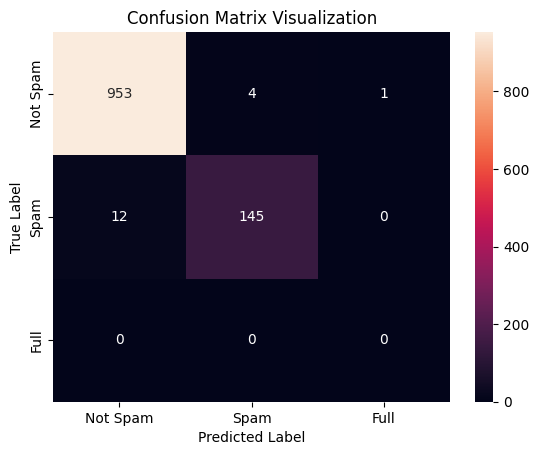

In [35]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from matplotlib import pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=['Not Spam', 'Spam','Full'], yticklabels=['Not Spam', 'Spam','Full'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Visualization')
plt.show()

In [36]:
emails = [
    'Hey mohan, can we get together to watch footbal game tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!'
]
emails_count = v.transform(emails)
model.predict(emails_count)

array(['ham', 'spam'], dtype='<U14')

In [37]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('nb', MultinomialNB())
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

                precision    recall  f1-score   support

           ham       0.99      0.99      0.99       958
          spam       0.97      0.92      0.95       157
{"mode":"full"       0.00      0.00      0.00         0

      accuracy                           0.98      1115
     macro avg       0.65      0.64      0.65      1115
  weighted avg       0.99      0.98      0.99      1115



/home/intellect/Documents/Spam_NaiveBayes/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/intellect/Documents/Spam_NaiveBayes/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/intellect/Documents/Spam_NaiveBayes/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifi

In [39]:
pipe.predict(emails)

array(['ham', 'spam'], dtype='<U14')